### Projeto desenvolvido para comprimento de créditos no Mestrado PPCA/UNB
### Disciplina: Mineração de Dados Massivos
### Professor: Thiago de Paulo Faleiros

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn import metrics
import random
import sys
import time
%matplotlib inline

In [ ]:
X=np.array([[1,1,1, 1], [2,3,4,10], [8,5,4,2]])
w=np.array([[3,-5, 9]])
y=sum(X*w.T)
print(X.T, y)
X.shape

[[ 1  2  8]
 [ 1  3  5]
 [ 1  4  4]
 [ 1 10  2]] [ 65  33  19 -29]


(3, 4)

## Algoritmo Gradiente Descendente (GD)

In [ ]:
def gd(X, y, nr_epoch=20000, lr=0.001, tol=10**-6):
  std=y.std()
  s_erro=[]
  p=X.shape[0] # número de variáveis
  w=np.random.normal(0, std, size=(1,p))
  for i in range(nr_epoch):
    y_hat=sum(X*w.T) # calcula o valor da f no ponto
    grad=X@(y_hat-y).T # calcula o gradiente de f no ponto
    erro=sum(y_hat-y)**2/len(y)
    s_erro.append(erro)
    w=w-lr*grad
    if i > 5 and abs(s_erro[i] - s_erro[i-5]) < tol:
      print("Algoritmo convergiu, epoch {}, para as seguintes estimativas: \n w: {}".format(i, np.round(w[0],4)))
      break
    elif i%400==0:
      print("epoch: {},   w: {},   erro: {}".format(str(i).zfill(4),np.round(w[0],4), np.round(erro,4)))
  return s_erro


## Exemplo 1 - Regressão Linear Múltipla (Caso didático)

In [ ]:
for i in range(1):
  base_erro=gd(X, y, lr=0.01)

epoch: 0000,   w: [-11.3478 -66.2343  36.601 ],   erro: 323298.67
epoch: 0400,   w: [-6.123  -4.2394 10.1235],   erro: 0.1205
epoch: 0800,   w: [-3.7295 -4.4389  9.8287],   erro: 0.0656
epoch: 1200,   w: [-1.964  -4.5861  9.6113],   erro: 0.0357
epoch: 1600,   w: [-0.6616 -4.6947  9.4509],   erro: 0.0194
epoch: 2000,   w: [ 0.299  -4.7748  9.3326],   erro: 0.0106
epoch: 2400,   w: [ 1.0077 -4.8339  9.2454],   erro: 0.0057
epoch: 2800,   w: [ 1.5304 -4.8775  9.181 ],   erro: 0.0031
epoch: 3200,   w: [ 1.9159 -4.9096  9.1335],   erro: 0.0017
epoch: 3600,   w: [ 2.2004 -4.9333  9.0985],   erro: 0.0009
epoch: 4000,   w: [ 2.4101 -4.9508  9.0726],   erro: 0.0005
epoch: 4400,   w: [ 2.5649 -4.9637  9.0536],   erro: 0.0003
epoch: 4800,   w: [ 2.6791 -4.9732  9.0395],   erro: 0.0001
Algoritmo convergiu, na epoch 4886, para as seguintes estimativas: 
 w: [ 2.6994 -4.9749  9.037 ]


## Decaimento do Erro (MSE)

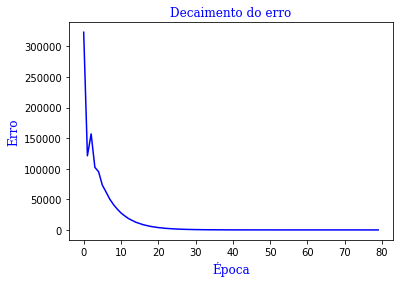

In [ ]:
font = {'family': 'serif',
#        'color':  'darkred',
        'color':  'blue',
        'weight': 'normal',
        'size': 12,
        }
plt.plot(base_erro[:80], 'b')
plt.title('Decaimento do erro', fontdict=font)
plt.xlabel('Época', fontdict=font)
plt.ylabel('Erro', fontdict=font)

# Tweak spacing to prevent clipping of ylabel
plt.subplots_adjust(left=0.15)
plt.show()

## Stochastic Gradiente Descendente - Regressão Linear

In [ ]:
def particionamento(dados, nr_part=None):
  particao=[]
  if nr_part==None:
     nr_part=len(y)
  for j in range(nr_part):
    particao_crt = [tup[0] for tup in list(enumerate(y)) if tup[0] % nr_part==j]
    particao.append(particao_crt)
  return particao

def sgd(X, y, nr_epoch, nr_part=None, lr=0.01, tol=0.0001):

  std=y.std()
  s_erro=[]
  dados = np.c_[X,y]
  p=X.shape[1] # número de variáveis
  w=np.random.normal(0, std, size=(1,p))
  particao=particionamento(y,nr_part)
  iteracao=0
  tt_iteracoes=nr_part*nr_epoch # total de iterações
  flag=False
  converg=0
  for epoch in range(nr_epoch):
    dados=np.random.permutation(dados) # permuta o conjunto
    for id in range(len(particao)):
      #print("particao:", particao[id])
      X_crt=dados[particao[id],:len(X[0])].T
      y_crt=dados[particao[id],-1]
      y_hat=np.sum(X_crt*w.T) # calcula o valor da f no ponto
      grad=(1.0/len(y_crt))*(X_crt @ (y_hat-y_crt).T)
      erro=sum(y_hat-y_crt)**2/len(y_crt)
      s_erro.append(erro)
      w=w-lr*grad
      iteracao +=1
#      if iteracao % int((nr_part*nr_epoch)/20)==0:
#        print("iteracao: {}, w: {}, erro:  {}".format(str(iteracao).zfill(5), np.round(w[0],4), np.round(erro,4)))
      if iteracao >= tt_iteracoes:
        print("*** Atenção: algoritmo não convergiu para os parâmetros de tolerância de learn-rate informados!")
        print("iteracao: {}, w: {}, erro:  {}".format(str(iteracao).zfill(5), np.round(w[0],4), np.round(erro,4)))
        converg=0
        break
      elif (iteracao > 10) and abs(erro - s_erro[iteracao-10]) < tol:
        print("*** Sucesso: algoritmo convergiu, na iteração {}, para as seguintes estimativas: \n {}".format(iteracao, w[0]))
        converg=1
        return s_erro, w, converg
#  end = time.time()
#  print(end - start)
  return s_erro, w, converg

## Exemplo 2 - Regressão Linear Múltipla

In [ ]:
nobs=400
X0 = np.random.normal(0, 5, size=(nobs,4))
X = np.c_[np.ones((nobs, 1)),X0] # add x0 = 1 to each instance
w0=np.array([[3,-8.75, 12, -15, 52]])
y=np.round(sum(X.T*w0.T),2)
del w0
resultado=[[],[], [],[], []]
for i, qt_part in enumerate([int(nobs*(i/100)) for i in range(100,10,-5)]):
  start = time.time()
  base_erro, w, in_converg =sgd( X
      ,y
      , 1000 # numero de iteracoes
      , qt_part  # numero de partições: None=n partições.
      , 0.001 # learne-rate ou taxa de aprendizagem
      , 10**-2 # tolerância
      )
  end = time.time()
  print("-"*100)
  print("Número de partições:", qt_part)
  print("Erro de partida: {}, Erro Final: {}".format(np.round(base_erro[0],4), np.round(base_erro[-1],4)))
  print("Tempo decorrido: {}".format(round(end - start,6)))
  resultado[0].append(round(end - start,6))
  resultado[1].append(qt_part)
  resultado[2].append(np.round(base_erro[0],4)) # erro inicial
  resultado[3].append(np.round(base_erro[-1],4)) # erro final
  resultado[4].append(in_converg)
print(resultado)

*** Sucesso: algoritmo convergiu, na iteração 3279, para as seguintes estimativas: 
 [ -1.66487319  -8.61987415  12.18609035 -15.02811589  52.03751201]
----------------------------------------------------------------------------------------------------
Número de partições: 400
Erro de partida: 11193203.2457, Erro Final: 32.1554
Tempo decorrido: 0.116209
*** Sucesso: algoritmo convergiu, na iteração 2811, para as seguintes estimativas: 
 [  5.03320198  -8.8604056   12.2020355  -14.96311845  51.77028291]
----------------------------------------------------------------------------------------------------
Número de partições: 380
Erro de partida: 38503830.8088, Erro Final: 0.0043
Tempo decorrido: 0.109744
*** Sucesso: algoritmo convergiu, na iteração 4534, para as seguintes estimativas: 
 [ -0.78412697  -8.7948771   12.03547784 -14.90076991  51.92777788]
----------------------------------------------------------------------------------------------------
Número de partições: 360
Erro de par

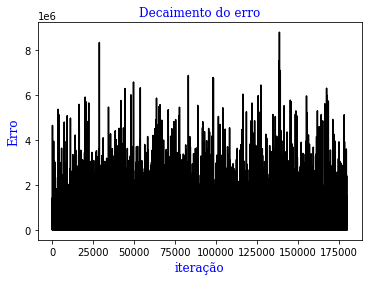

In [ ]:
font = {'family': 'serif',
#        'color':  'darkred'
        'color':  'blue',
        'weight': 'normal',
        'size': 12,
        }
plt.plot(base_erro[100:], 'k')
plt.title('Decaimento do erro', fontdict=font)
plt.xlabel('iteração', fontdict=font)
plt.ylabel('Erro', fontdict=font)

# Tweak spacing to prevent clipping of ylabel
plt.subplots_adjust(left=0.15)
plt.show()

In [ ]:
# cria dataset 
dicionario={'particoes':resultado[1]
             ,'tempo':resultado[0]
             ,'erro_inicial':resultado[2]
             ,'erro_final':resultado[3]
             ,'convergencia':resultado[4]
             }
df=pd.DataFrame(dicionario)
df

,particoes,tempo,erro_inicial,erro_final,convergencia
0,400,0.116209,1.119320e+07,3.215540e+01,1
1,380,0.109744,3.850383e+07,4.300000e-03,1
2,360,0.190228,1.421756e+07,1.897210e+01,1
3,340,0.147420,1.093200e+08,1.370000e-02,1
4,320,0.123066,2.202612e+06,2.362000e-01,1
5,300,0.111662,8.208655e+06,1.570000e-01,1
6,280,0.784377,8.987172e+03,4.856000e-01,1
7,260,0.147652,2.297404e+08,5.510000e-02,1
8,240,0.262464,9.836311e+05,2.078690e+01,1
9,220,1.547034,2.124583e+07,1.895150e+01,1


### Exportando resultados

In [ ]:
df.to_csv("resultado.csv", index=False)
from google.colab import files
files.download('resultado.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>